<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/v5/v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Zadatak 1

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/adult.csv', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'Broj kategorickih znacajki: {len(categorical)}')
print('Kategoricke znacajke:', categorical)

Broj kategorickih znacajki: 9
Kategoricke znacajke: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [ ]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print(f'Broj numerickih znacajki: {len(numerical)}')
print('Numericke znacajke:', numerical)

Broj numerickih znacajki: 6
Numericke znacajke: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
data['workclass'] = data['workclass'].replace(' ?', np.nan)
data['occupation'] = data['occupation'].replace(' ?', np.nan)
data['native_country'] = data['native_country'].replace(' ?', np.nan)

## Zadatak 1.1.

In [ ]:
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native_country'] = data['native_country'].fillna(data['native_country'].mode()[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Zadatak 1.2.

In [ ]:
prepare_encoding = data.drop(numerical, axis=1)
prepare_encoding = prepare_encoding.drop('income', axis=1)
prepare_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital_status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native_country  32561 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.one_hot import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(prepare_encoding)
encoded_data.head()

,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_1,education_2,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Zadatak 1.3.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[numerical]
X = X.join(encoded_data)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 105 entries, age to native_country_41
dtypes: int64(105)
memory usage: 26.1 MB


In [ ]:
Y = data['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Zadatak 1.4.

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.36363636, -0.89812969,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.51948052,  0.81437018, -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.66233766, -0.59334418, -1.66666667, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.98701299, -0.52857128, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72727273,  1.08047677, -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83116883,  0.21607351,  0.33333333, ...,  0.        ,
         0.        ,  0.        ]])

### Zadatak 1.5.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
predictions = gnb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test, predictions))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      7422
        >50K       0.00      0.00      0.00      2347

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


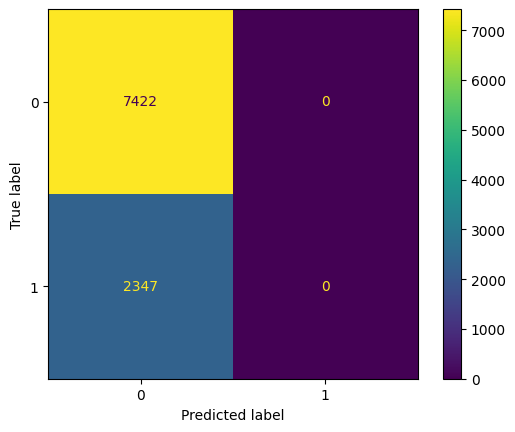

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predictions))

confusion_matrix.plot()

plt.show()

# Zadatak 2

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['sci.med', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
ind = 31
print(train.data[ind])

From: MAILRP%ESA.BITNET@vm.gmd.de
Subject: message from Space Digest
X-Added: Forwarded by Space Digest
Organization: [via International Space University]
Original-Sender: isu@VACATION.VENARI.CS.CMU.EDU
Distribution: sci
Lines: 62





Press Release No.19-93
Paris, 22 April 1993

Users of ESA's Olympus satellite report on the outcome of
their experiments

"Today Europe's space telecommunications sector would not
be blossoming as it now does, had OLYMPUS not provided
a testbed for the technologies and services of the 1990s". This
summarises the general conclusions of 135 speakers and 300
participants at the Conference on Olympus Utilisation held in
Seville on 20-22-April 1993. The conference was organised by
the European Space Agency (ESA) and the Spanish Centre for
the Development of Industrial Technology (CDTI).

OLYMPUS has been particularly useful :
-      in bringing satellite telecommunications to thousands of
       new users, thanks to satellite terminals with very small
       

In [ ]:
train.target_names[train.target[ind]]

'sci.space'

### Zadatak 2.1.

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [43]:
stops = set(stopwords.words('english'))
stemmer = PorterStemmer().stem

In [44]:
def process_data(sentences_list):
  processed_sentences = []
  for sentence in sentences_list:
    # tokenizacija recenice na rijeci
    words = word_tokenize(sentence)
    # korjenovanje i izbacivanje stop rijeci, te uklanjanje ne-alfabetskih tokena
    stemmed_words = [stemmer(word) for word in words if word not in stops and word.isalpha()]
    # nova procesirana recenica
    processed_sentences.append(' '.join(stemmed_words))
  return processed_sentences

In [45]:
train_processed_sentences = process_data(train.data)
test_processed_sentences = process_data(test.data)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
vectorized_train_data = tfidf.fit_transform(train_processed_sentences)
vectorized_test_data = tfidf.transform(test_processed_sentences)

### Zadatak 2.2.

In [47]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(vectorized_train_data, train.target)

MultinomialNB()

In [51]:
predictions_mnb = mnb.predict(vectorized_test_data)

                        precision    recall  f1-score   support

               sci.med       0.94      0.92      0.93       389
soc.religion.christian       0.97      0.86      0.91       396
             sci.space       0.95      0.94      0.94       394
         comp.graphics       0.87      0.98      0.92       398

              accuracy                           0.93      1577
             macro avg       0.93      0.93      0.93      1577
          weighted avg       0.93      0.93      0.93      1577



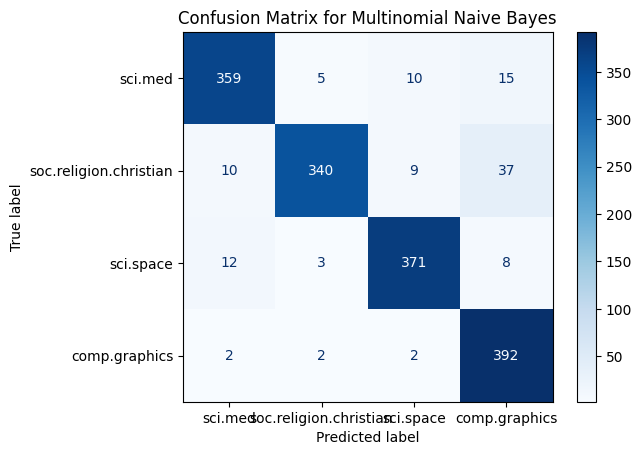

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(test.target, predictions_mnb, target_names=categories))

cm_mnb = confusion_matrix(test.target, predictions_mnb)
disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=categories)
disp_mnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

### Zadatak 2.3.

In [55]:
primjer1 = 'a healthy mind in a healthy body'
primjer2 = 'discussing the existence of God'
primjer3 = 'determining the screen resolution'

In [68]:
print(primjer1, " - > ", categories[mnb.predict(tfidf.transform([primjer1]))[0]])
print(primjer2, " - > ", categories[mnb.predict(tfidf.transform([primjer2]))[0]])
print(primjer3, " - > ", categories[mnb.predict(tfidf.transform([primjer3]))[0]])

a healthy mind in a healthy body  - >  comp.graphics
discussing the existence of God  - >  comp.graphics
determining the screen resolution  - >  sci.med


Rezultati nisu očekivani, `primjer1` bi trebao biti kategoriziran kao `sci.med`, `primjer2` kao `soc.religion.christian`, a `primjer3` kao `comp.graphics`.